## Homework - 2

### Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

### EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail? 

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

### Question 1

Find a feature with missing values. How many missing values does it have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
features = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

df = df[features]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [6]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

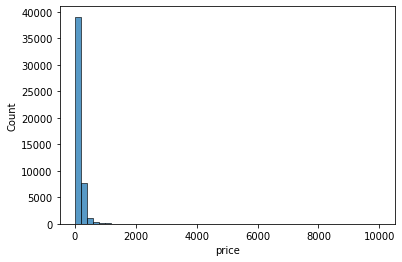

In [7]:
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

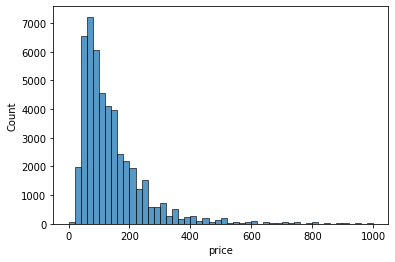

In [8]:
sns.histplot(df.price[df.price < 1000], bins=50)

In [9]:
price_logs = np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

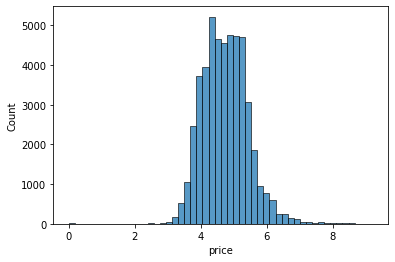

In [10]:
sns.histplot(price_logs, bins=50)

In [11]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [12]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
df.minimum_nights.median()

3.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [14]:
np.random.seed(42)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [15]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)
n_val, n_test, n_train
# n_val+n_test+n_train

(9779, 9779, 29337)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [19]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

<AxesSubplot:>

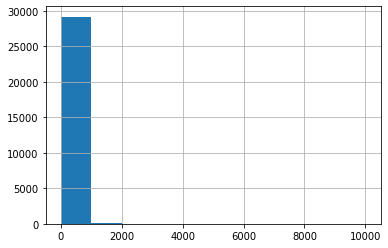

In [20]:
df_train['price'].hist()

In [21]:
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

In [22]:
del df_train['price']
del df_test['price']
del df_val['price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [24]:
def prepare(df, mean = 0):
    df = df.copy()
    
    if mean == 0:
        df = df.fillna(0)
    else:
        df = df.fillna(mean)
    
    X = df.values
    
    return df

In [26]:
X_train = prepare(df_train)
X_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000
mean,40.729226,-73.951838,6.989740,23.312336,1.088747,7.125166,112.825988
std,0.054399,0.046325,21.014583,44.628122,1.575070,32.844933,131.730809
min,40.507080,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690460,-73.982890,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723450,-73.955590,2.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763170,-73.935880,5.000000,24.000000,1.580000,2.000000,228.000000
max,40.913060,-73.712990,1000.000000,629.000000,27.950000,327.000000,365.000000


In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [30]:
rmse(y_train, y_pred)

0.642886048486043

In [31]:
X_val = prepare(df_val)
w0, w = train_linear_regression(X_val, y_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

0.64

In [32]:
X_train = prepare(df_train, df_train['reviews_per_month'].mean())
X_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000
mean,40.729226,-73.951838,6.989740,23.312336,1.368549,7.125166,112.825988
std,0.054399,0.046325,21.014583,44.628122,1.475196,32.844933,131.730809
min,40.507080,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690460,-73.982890,1.000000,1.000000,0.270000,1.000000,0.000000
50%,40.723450,-73.955590,2.000000,5.000000,1.210000,1.000000,45.000000
75%,40.763170,-73.935880,5.000000,24.000000,1.580000,2.000000,228.000000
max,40.913060,-73.712990,1000.000000,629.000000,27.950000,327.000000,365.000000


In [33]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [34]:
rmse(y_train, y_pred)

0.6429347474014221

In [35]:
X_val = prepare(df_val, df_train['reviews_per_month'].mean())
w0, w = train_linear_regression(X_val, y_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

0.64

In [36]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [37]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0 -419.91266029278876 0.64
1e-06 -419.8627175103293 0.64
0.0001 -414.9764942017882 0.64
0.001 -375.2736539278298 0.64
0.01 -191.78384090385518 0.66
0.1 -32.56256056701337 0.68
1 -3.4992168342197387 0.68
5 -0.7033623178329543 0.68
10 -0.3512767612401267 0.68


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [39]:
def seed_check(df, seed):

    scores = []
    
    for i in seed:
        df = df.copy()    
        n = len(df)
        idx = np.arange(n)

        n_val = int(n * 0.2)
        n_test = int(n * 0.2)
        n_train = n - n_val - n_test
        
        np.random.seed(i)
        np.random.shuffle(idx)

        df_train = df.iloc[idx[:n_train]]
        df_val = df.iloc[idx[n_train:n_train+n_val]]
        df_test = df.iloc[idx[n_train+n_val:]]

        df_train = df_train.reset_index(drop = True)
        df_test = df_test.reset_index(drop = True)
        df_val = df_val.reset_index(drop = True)

        y_train = np.log1p(df_train['price'].values)
        y_val = np.log1p(df_val['price'].values)
        y_test = np.log1p(df_test['price'].values)

        del df_train['price']
        del df_test['price']
        del df_val['price']
        
        X_train = df_train.fillna(0).values
        w0, w = train_linear_regression(X_train, y_train)
        
        X_val = df_val.fillna(0).values
        y_pred = w0 + X_val.dot(w)
        score = rmse(y_val, y_pred)
        print(i, score)
        scores.append(score)
    
    scores_std = np.std(np.array(scores))
    return round(scores_std, 3)

In [40]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
seed_check(df, seed)

0 0.6549779960982538
1 0.6462523685596189
2 0.6476558176507964
3 0.6375145070224949
4 0.6445809083240439
5 0.6305809996021123
6 0.6297851916035687
7 0.6506184266939097
8 0.6489780353511762
9 0.6437565168320458


0.008

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [42]:
def seed_9_test_set(df, seed=[9]):
      
    for i in seed:
        scores = []
        df = df.copy()
        n = len(df)
        idx = np.arange(n)
        n_val = int(n * 0.2)
        n_test = int(n * 0.2)
        n_train = n - n_val - n_test

        np.random.seed(i)
        np.random.shuffle(idx)
        
        df_train = df.iloc[idx[:n_train]]
        df_val = df.iloc[idx[n_train:n_train+n_val]]
        df_test = df.iloc[idx[n_train+n_val:]]
    
        df_train = pd.concat([df_train, df_val])

        df_train = df_train.reset_index(drop = True)
        df_test = df_test.reset_index(drop = True)

        y_train = np.log1p(df_train['price'].values)
        y_test = np.log1p(df_test['price'].values)

        del df_train['price']
        del df_test['price']
        
        X_train = df_train.fillna(0).values
        w0, w = train_linear_regression_reg(X_train, y_train)

        X_test = df_test.fillna(0).values
        y_pred = w0 + X_test.dot(w)
        score = rmse(y_test, y_pred)
        print(i, score)
        scores.append(round(score,2))
    
    return scores

In [43]:
seed_9_test_set(df)

9 0.6452771348364296


[0.65]

## Submit the results

Submit your results here: https://forms.gle/2N9GkTr1AgNeZ8hD7.

If your answer doesn't match options exactly, select the closest one.

## Deadline


The deadline for submitting is 20 September 2021, 17:00 CET. After that, the form will be closed.

